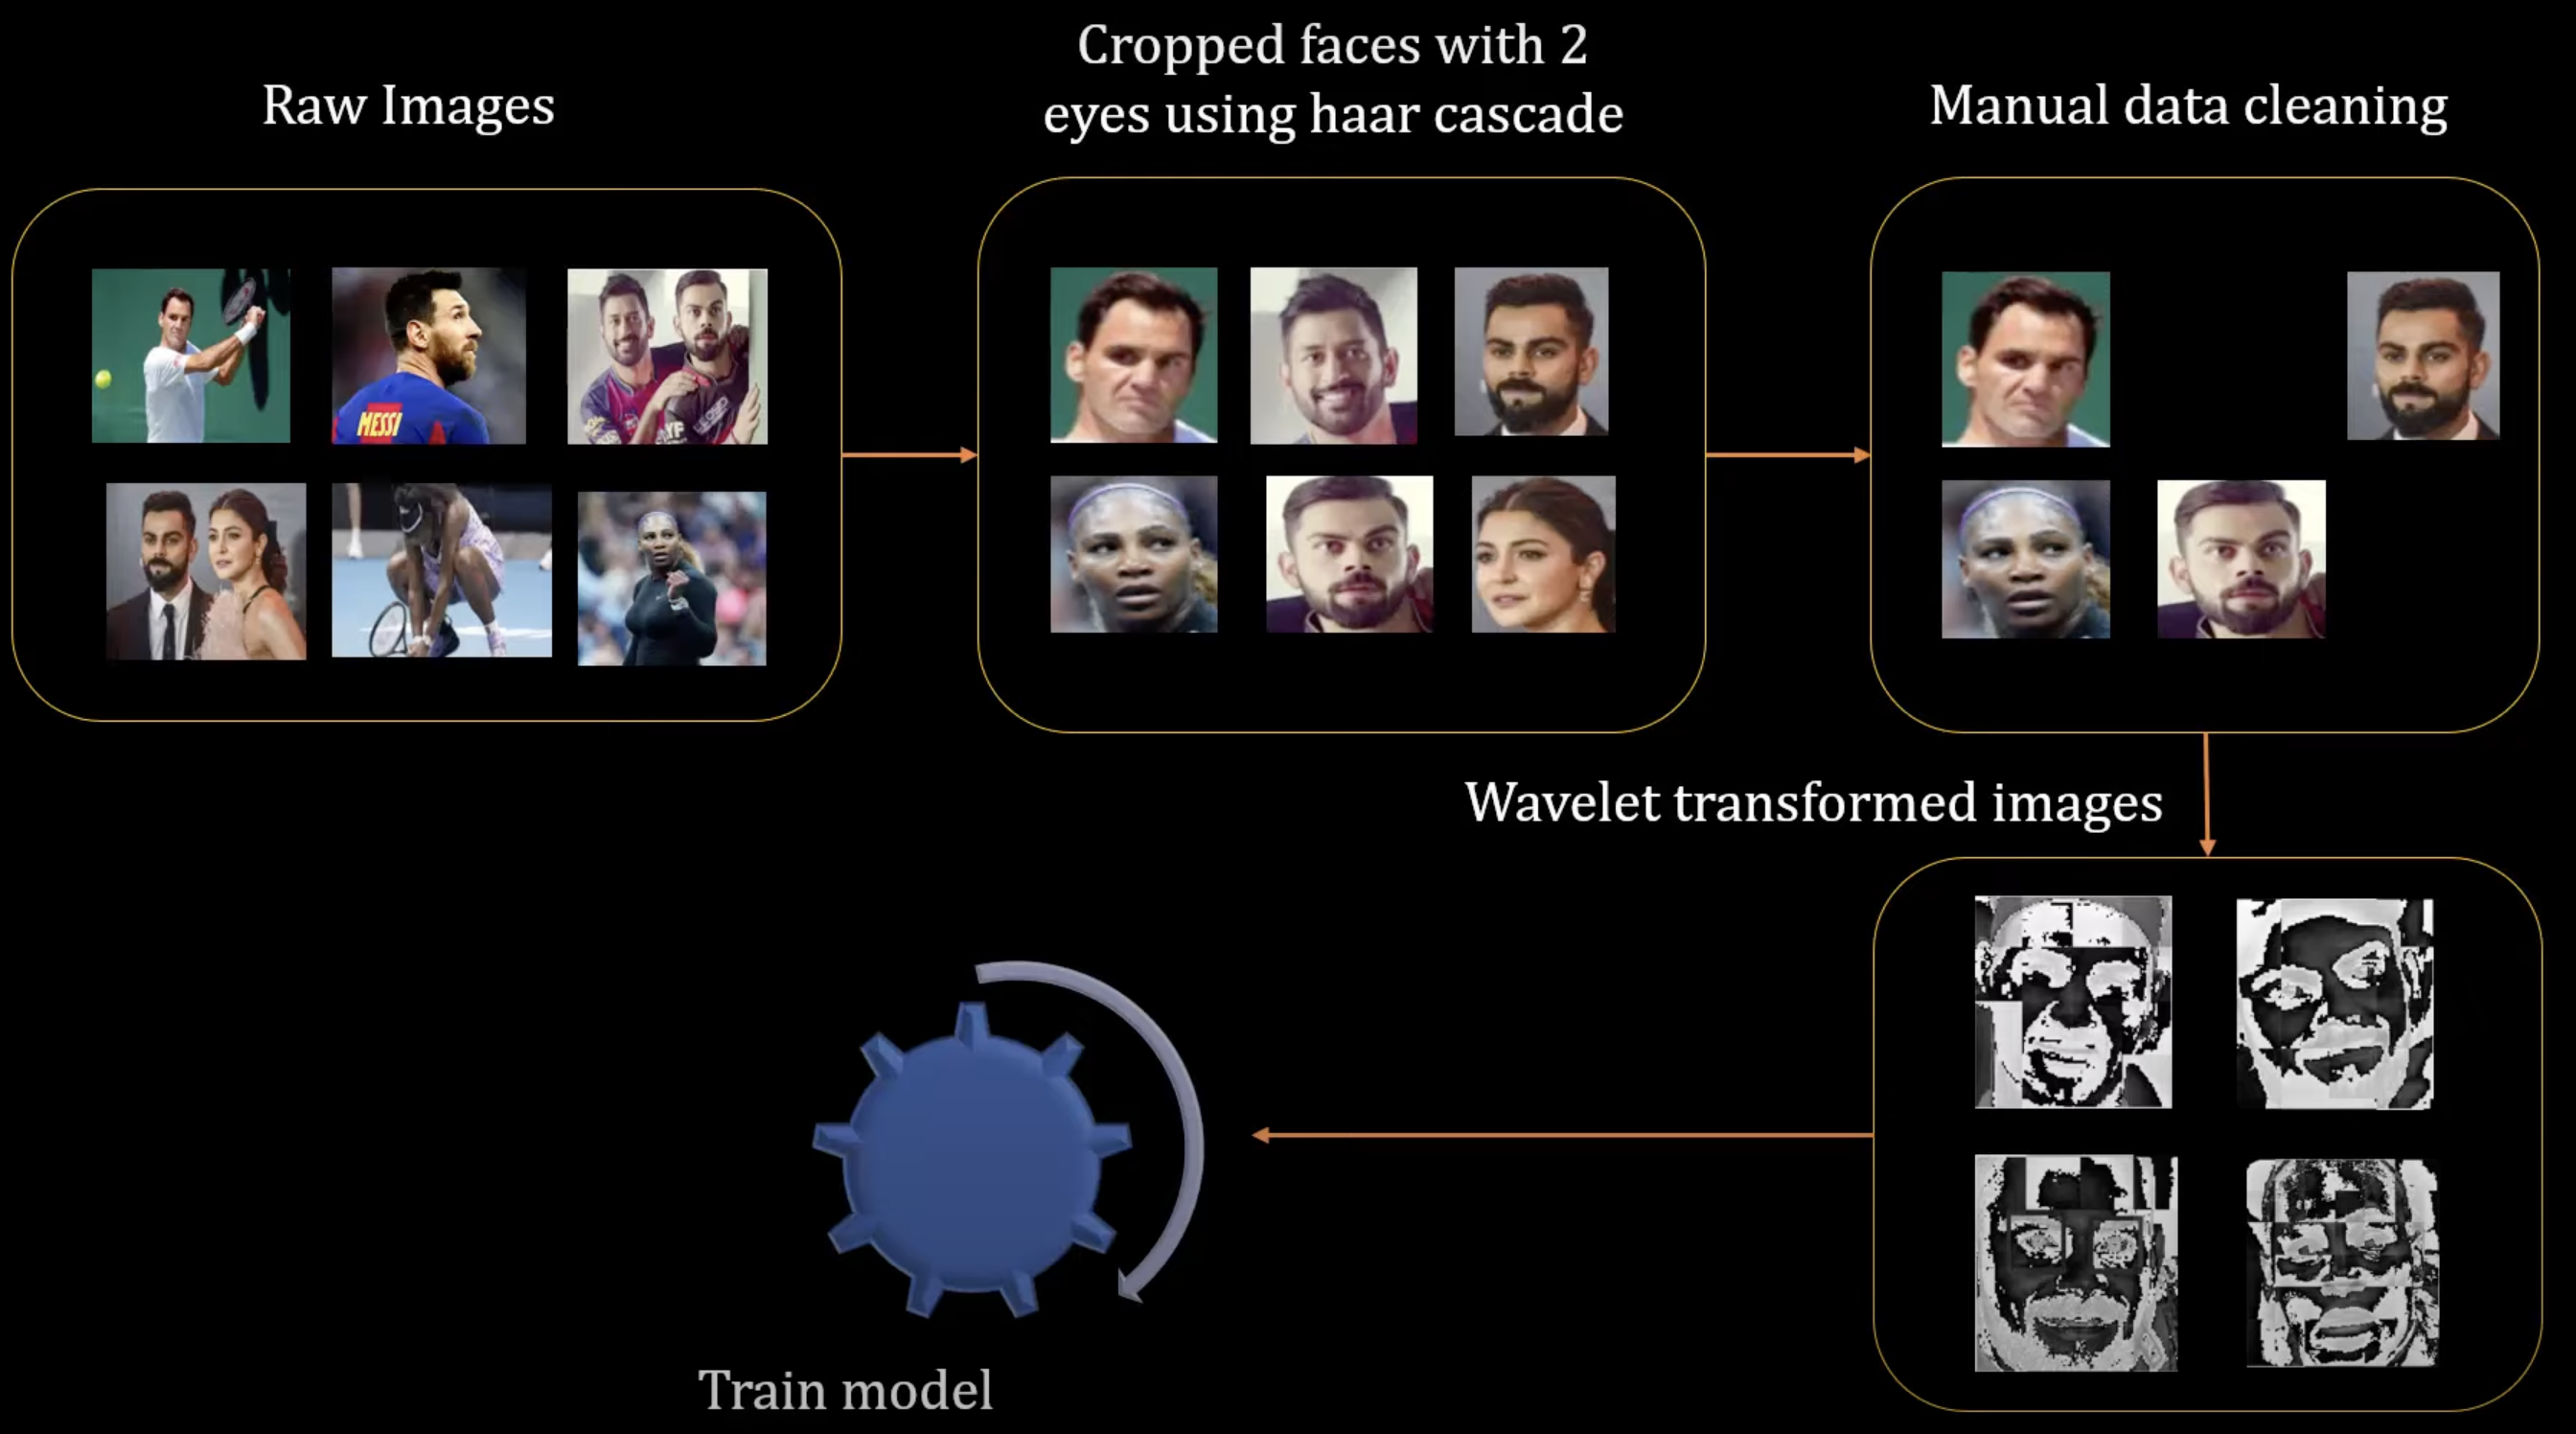

In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 

%matplotlib inline

In [24]:
img = cv2.imread('./test_images/messi1.jpg')
img.shape   #in here we can see we have x,y values and third dimension is r,g,b

(576, 1024, 3)

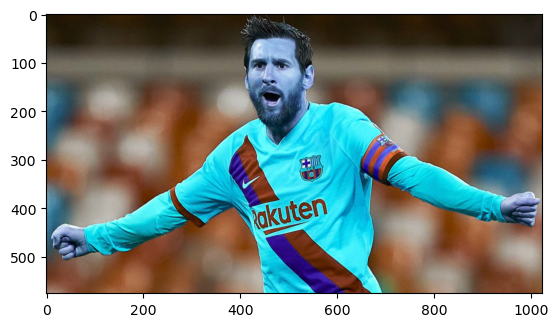

In [25]:
plt.imshow(img)

In [26]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(576, 1024)

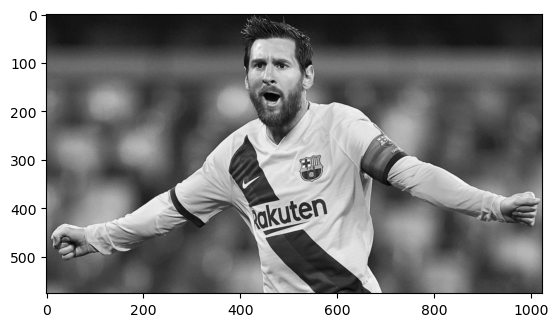

In [29]:
plt.imshow(gray, cmap='gray')

In [19]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3,5)
faces   # it provides x,y,width,height of face

array([[394,  54, 138, 138]], dtype=int32)

In [20]:
(x,y,w,h) = faces[0]
x,y,w,h

(394, 54, 138, 138)

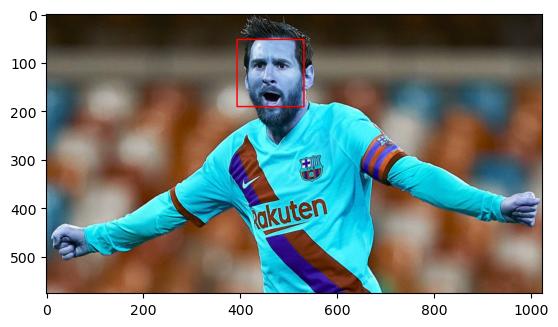

In [21]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

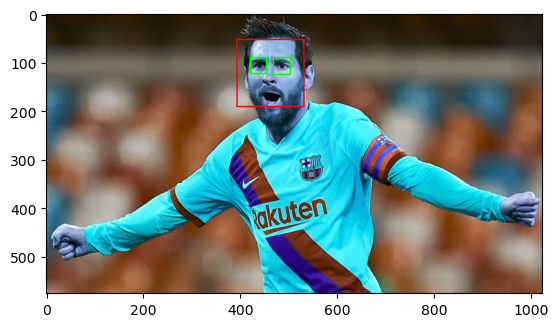

In [30]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0), 2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

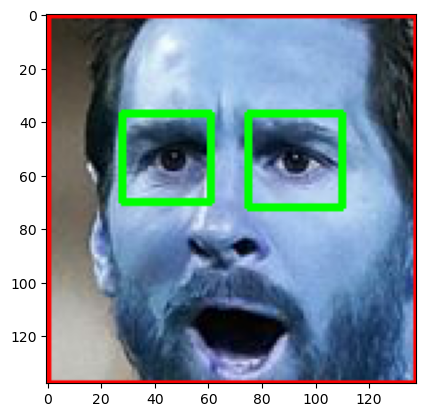

In [31]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [220]:
def detect_face(img_path):
        img = cv2.imread(img_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml').detectMultiScale(gray, 1.3,5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h,x:x+w]
            roi_color = img[y:y+h,x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes)>=2:
                return roi_color

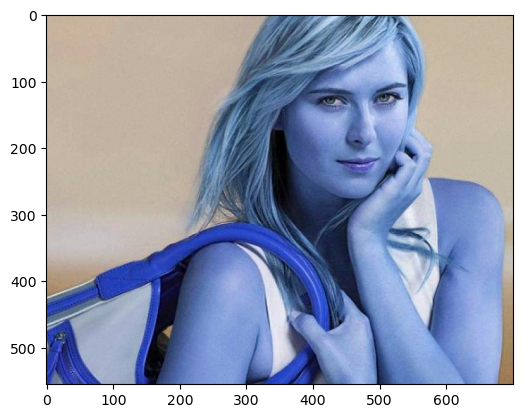

In [250]:
original_img = cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(original_img)

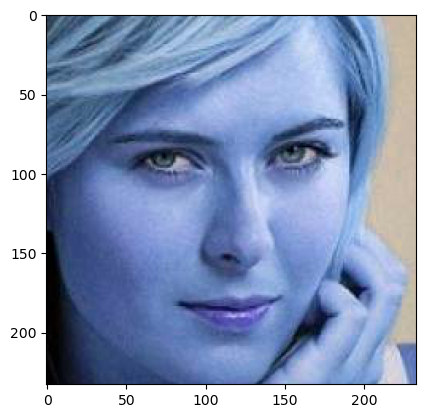

In [251]:
cropped_img = detect_face('./test_images/sharapova1.jpg')
plt.imshow(cropped_img)

In [224]:
cropped_img = detect_face('./test_images/messi2.jpg')
cropped_img

In [225]:
path_to_data = './data/'
path_to_crop_data = './croped_data/'

In [226]:
# next we are going to get all the directories under data folder

import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
        

In [227]:
img_dirs

['./data/maria_sharapova',
 './data/virat_kohli',
 './data/lionel_messi',
 './data/angela_white',
 './data/serena_williams',
 './data/roger_federer']

In [228]:
# now we are going to create data folders of cropped data
import shutil
if os.path.exists(path_to_crop_data):
    shutil.rmtree(path_to_crop_data)
os.mkdir(path_to_crop_data )


In [269]:
cropped_image_dirs = []
celebrity_file_name_dict = {}
for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    count=1
    celebrity_file_name_dict[celebrity_name]=[]
    for entry in os.scandir(img_dir):
        roi_color = detect_face(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_crop_data + celebrity_name 
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Genereating : ", cropped_folder)
            cropped_file_name = celebrity_name+str(count)+".png"
            cropped_file_path = cropped_folder+'/'+cropped_file_name
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_name_dict[celebrity_name].append(cropped_file_path)
            count += 1
        
    
    

maria_sharapova
virat_kohli
lionel_messi
angela_white
serena_williams
roger_federer


In [270]:
celebrity_file_name_dict

{'maria_sharapova': ['./croped_data/maria_sharapova/maria_sharapova1.png',
  './croped_data/maria_sharapova/maria_sharapova2.png',
  './croped_data/maria_sharapova/maria_sharapova3.png',
  './croped_data/maria_sharapova/maria_sharapova4.png',
  './croped_data/maria_sharapova/maria_sharapova5.png',
  './croped_data/maria_sharapova/maria_sharapova6.png',
  './croped_data/maria_sharapova/maria_sharapova7.png',
  './croped_data/maria_sharapova/maria_sharapova8.png',
  './croped_data/maria_sharapova/maria_sharapova9.png',
  './croped_data/maria_sharapova/maria_sharapova10.png',
  './croped_data/maria_sharapova/maria_sharapova11.png',
  './croped_data/maria_sharapova/maria_sharapova12.png',
  './croped_data/maria_sharapova/maria_sharapova13.png',
  './croped_data/maria_sharapova/maria_sharapova14.png',
  './croped_data/maria_sharapova/maria_sharapova15.png',
  './croped_data/maria_sharapova/maria_sharapova16.png',
  './croped_data/maria_sharapova/maria_sharapova17.png',
  './croped_data/mari

We have done the cropping the faces and we have to clean the data manually

# Now we are using wavelet transformation

In [266]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    # convert img to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    # convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs = pywt.wavedec2(imArray,mode,level=level)
    
    # process coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0
    
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

In [ ]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

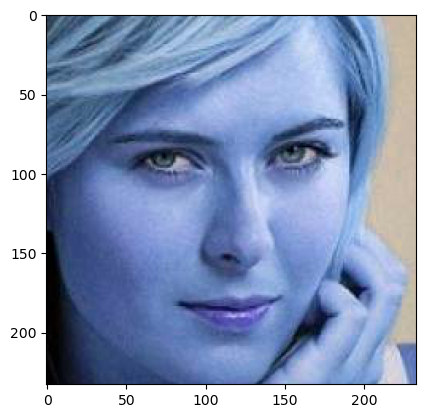

In [267]:
cropped_img1 = detect_face('./test_images/sharapova1.jpg')
plt.imshow(cropped_img1)

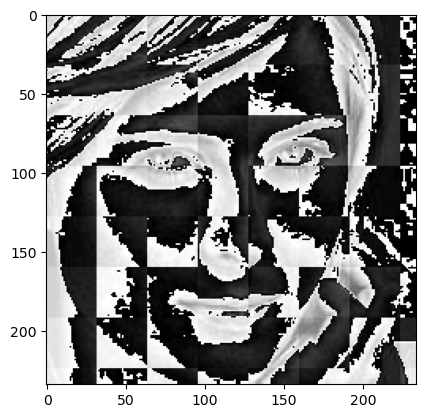

In [268]:
im_har = w2d(cropped_img1,'db1',5)
plt.imshow(im_har, cmap='gray')

In [271]:
celebrity_file_name_dict

{'maria_sharapova': ['./croped_data/maria_sharapova/maria_sharapova1.png',
  './croped_data/maria_sharapova/maria_sharapova2.png',
  './croped_data/maria_sharapova/maria_sharapova3.png',
  './croped_data/maria_sharapova/maria_sharapova4.png',
  './croped_data/maria_sharapova/maria_sharapova5.png',
  './croped_data/maria_sharapova/maria_sharapova6.png',
  './croped_data/maria_sharapova/maria_sharapova7.png',
  './croped_data/maria_sharapova/maria_sharapova8.png',
  './croped_data/maria_sharapova/maria_sharapova9.png',
  './croped_data/maria_sharapova/maria_sharapova10.png',
  './croped_data/maria_sharapova/maria_sharapova11.png',
  './croped_data/maria_sharapova/maria_sharapova12.png',
  './croped_data/maria_sharapova/maria_sharapova13.png',
  './croped_data/maria_sharapova/maria_sharapova14.png',
  './croped_data/maria_sharapova/maria_sharapova15.png',
  './croped_data/maria_sharapova/maria_sharapova16.png',
  './croped_data/maria_sharapova/maria_sharapova17.png',
  './croped_data/mari

In [272]:
celeb_names_dict = {}
count = 0
for celebrity_name in celebrity_file_name_dict.keys():
    celeb_names_dict[celebrity_name]=count
    count += 1

celeb_names_dict

{'maria_sharapova': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'angela_white': 3,
 'serena_williams': 4,
 'roger_federer': 5}

In [280]:
x=[]
y=[]
for celebrety_name, training_files in celebrity_file_name_dict.items():
    for training_img in training_files:
        img = cv2.imread(training_img)
        if img is None:
            continue
        scaled_raw_image = cv2.resize(img,(32,32))
        im_har = w2d(img,'db1',5)
        scaled_wav_image = cv2.resize(im_har,(32,32))
        #raw image has 3 color channels
        combined_img = np.vstack((scaled_raw_image.reshape(32*32*3,1),scaled_wav_image.reshape(32*32,1)))
        #cv2.imwrite('./wavelet_images/'+training_img.split('/')[-1], combined_img)
        x.append(combined_img)
        y.append(celeb_names_dict[celebrety_name])

In [281]:
len(x)

202

In [282]:
len(y)

202

In [283]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(202, 4096)

# Model Training

In [284]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [360]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=15))])

In [361]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=15))])

In [362]:
pipe.score(x_test, y_test)

0.803921568627451

In [363]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.92      0.92      0.92        12
           2       0.83      0.83      0.83         6
           3       0.71      0.71      0.71         7
           4       0.73      0.80      0.76        10
           5       1.00      0.67      0.80         6

    accuracy                           0.80        51
   macro avg       0.82      0.79      0.80        51
weighted avg       0.81      0.80      0.80        51



Use Gridsearch cv to get most accurate model and params

In [364]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [365]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params' : {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [366]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores, columns=['model','best_score', 'best_params'])

In [367]:
df

model  ...                                   best_params
0                  svm  ...        {'svc__C': 1, 'svc__kernel': 'linear'}
1        random_forest  ...  {'randomforestclassifier__n_estimators': 10}
2  logistic_regression  ...                  {'logisticregression__C': 1}

[3 rows x 3 columns]

In [368]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [371]:
best_estimators['svm'].score(x_test,y_test)

0.7843137254901961

In [372]:
best_clf = best_estimators['svm']

In [373]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[ 7,  0,  1,  1,  1,  0],
       [ 1, 11,  0,  0,  0,  0],
       [ 0,  0,  5,  1,  0,  0],
       [ 1,  0,  0,  5,  1,  0],
       [ 1,  0,  0,  1,  8,  0],
       [ 0,  1,  0,  0,  1,  4]])

Text(95.72222222222221, 0.5, 'Truth')

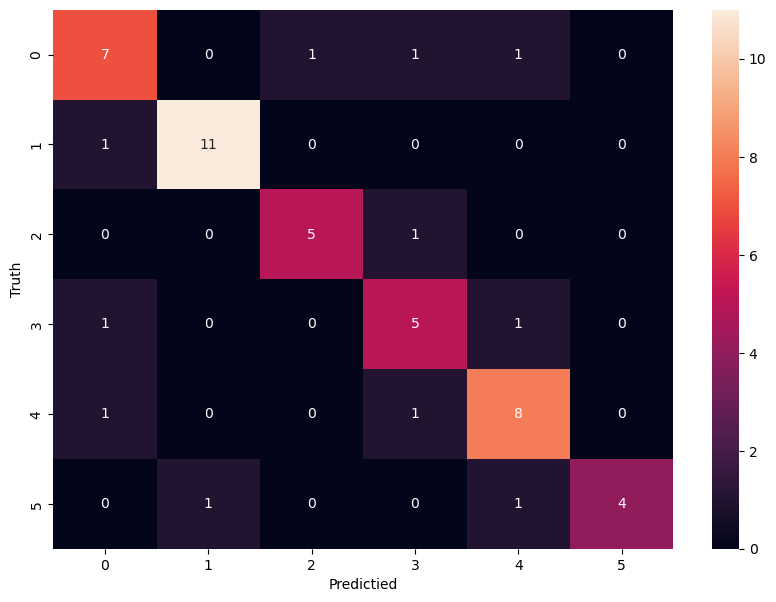

In [374]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predictied')
plt.ylabel('Truth')

In [375]:
celeb_names_dict

{'maria_sharapova': 0,
 'virat_kohli': 1,
 'lionel_messi': 2,
 'angela_white': 3,
 'serena_williams': 4,
 'roger_federer': 5}

# Save the model

In [380]:
!pip install joblib
import joblib
joblib.dump(best_clf, './model/face_detection_model.pkl')

['./model/face_detection_model.pkl']

# Save celeb names dict 

In [381]:
import json
with open("./model/celeb_names_dictionary.json", "w") as f:
    f.write(json.dumps(celeb_names_dict))